In [1]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os
import sys
import numpy as np
import copy
import scipy

from sklearn.preprocessing import normalize

sys.path.insert(0, "/home/anonymous/Desktop/eeg_sampling/modeling")
from dataio import readdata2, readlabels2, writedata
from datafilters import apply_dc_filter, apply_dwt_filter
from wignerville import wvd, filtered_wvd

In [81]:
dataset = readdata2("./../curated/raw-samples")
labels = readlabels2("./../curated/raw-inputs")

#Constants
fs = 250.0 #Frequency in Hz
sample_time = dataset[0].shape[1]/fs #Total time for sample
num_rows = 480 
num_channels = 8
rto = num_rows/(fs/2)

In [82]:
#Samples
data = []
data_avg = []
data = dataset[0][1,:,0]

In [83]:
#First filter
dc_lowcut = 1.0
dc_highcut = 30.0
dc_order = 2
dc_type = "bandpass"
dc_func_type = "butter"

data = apply_dc_filter(data, fs, dc_lowcut, dc_highcut, dc_order, dc_type, dc_func_type)

#First filter
dc_lowcut = 59.0
dc_highcut = 61.0
dc_order = 2
dc_type = "bandstop"
dc_func_type = "butter"
#data_dc = apply_dc_filter(data, fs, dc_lowcut, dc_highcut, dc_order, dc_type, dc_func_type)

In [84]:
interval_num = 7
xminsec = 0
xmaxsec = sample_time
xintervalsec = np.around([(xmaxsec - xminsec)/interval_num], decimals=2)[0]
xmin = xminsec*fs
xmax = xmaxsec*fs
xinterval = int((xmax - xmin)/interval_num)

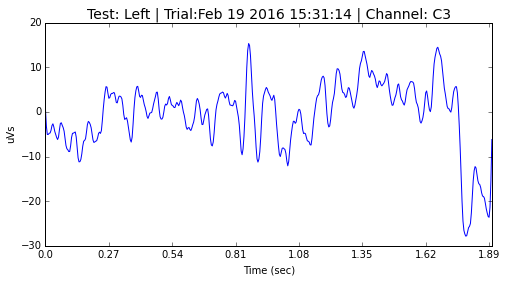

In [88]:
plt.figure(figsize=(8,4))
#plt.ylim([-8,8])
plt.xticks(np.arange(xmin, xmax, xinterval), np.arange(xminsec, xmaxsec, xintervalsec))
plt.xlabel("Time (sec)")
plt.ylabel("uVs")
plt.title("Test: Left | Trial:Feb 19 2016 15:31:14 | Channel: C3", fontsize = 14)
plt.plot(data)
#plt.plot(data1)
#plt.plot(data2)
#plt.plot(data3)
#plt.plot(data4)
#plt.legend(('T3', 'C3', 'Cz', 'C4', 'T4'))

In [76]:
front_cut = 0.000
back_cut = 0.000
cut_values = np.concatenate([np.arange(0, int(front_cut * fs)), np.arange(num_rows - int(back_cut * fs), num_rows)])
data = np.delete(data, cut_values, 0)
    
total_sample_time = sample_time - front_cut - back_cut

In [77]:
data_wv = wvd(data)[0]

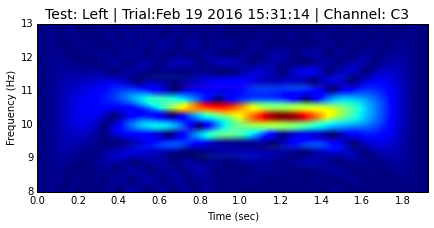

In [80]:
freq_min = 8.0
freq_max = 13.0
del_values = np.concatenate([np.arange(0, int(freq_min*rto)), np.arange(int(freq_max*rto), 480)])

im = data_wv.T
im = np.delete(im, del_values, 0)
im = scipy.absolute(im)
    
#Plots for comparison
plt.figure(1)
plt.figure(figsize=(7,3))
extent = [0, sample_time, freq_min, freq_max]
interpolation = "lanczos"
plt.subplot(1,1,1)
plt.imshow(scipy.absolute(im), extent=extent, origin='lower', aspect='auto', interpolation=interpolation)
plt.xticks(np.arange(0, total_sample_time, 0.2), np.arange(front_cut, sample_time - back_cut, 0.2))
plt.suptitle("Test: Left | Trial:Feb 19 2016 15:31:14 | Channel: C3", fontsize = 14)
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")
#plt.colorbar()